# wine Quality
First team project!

## Description

We will explore the relationships between a range of factors including acidity levels (fixed, volatile, and citric), residual sugar, chloride concentration, and others, with the goal of identifying the key drivers of wine quality. To achieve this, we will employ a robust and comprehensive data analysis approach, incorporating both statistical modeling and machine learning techniques. Through this analysis, we aim to pinpoint the factors that exert the most significant influence on the overall quality of California wines, offering valuable insights to inform wine production and quality enhancement strategies.

## Goal

* Find specific features that have similarities and group those features and label them using a clustering model.
* The purpose of the regression model is to predict quality based off features including those that the cluster model generated.

In [1]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

from wrangle import acquire_wine, wrangle_wine
from vis import quality_distribution, alcohol_distribution, alcohol_vs_quanity, density_vs_quantity, v_acidity_vs_quantity, qual_cluster, cluster_two_plt, cluster_two_plt
from explore import spearmanr_test, data_pipeline, bravo_pipeline, feature_selections_results, new_feats, cluster_two, data_pipeline_features, MinMax_Scaler_xy
from model import eval_baseline, train_model, test_model, train_hyper

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor


#set display peferences
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', False)

## Acquisition:
- Registered an account at data.world and downloaded the wine-quality dataset into a csv.
- Note there were 2 separate files, Red and White wines. 
- Used pandas to read in the csv file onto a jupyter notebook.

## Preparation:
- Created a new column "type" and assigned red / white respectively
- Replaced blank spaces with underscores for columns.
- Concatenated the 2 csv files into a single csv file. 

## Data dictionary

| Feature               | Description                                                            |
| --------------------- | -----------------------------------------------------------------------|
|fixed_acidity          | total amount of acids                                                  |
|volatile_acidity       | measure of volatile acids                                              |
|citric_acid            | measure of natural acid                                                |
|residual_sugar         | amount of sugar remaining in the wine after fermentation               |
|chlorides              | chloride concentration level                                           |
|total_sulfur_dioxide   | total amount of sulfur dioxide                                         |
|density                | mass of the wine per unit volume                                       |
|pH                     | measures the acidity or alkalinity of the wine on a scale from 0 to 14 |
|sulphates              | measure of compounds added to wine as a preservative.                  |
|alcohol                | alcohol by volume                                                      |
|quality                | rating of the wine's overall quality                                   |
|type                   | red or white wine                                                     |

<font size="4">A brief look at the data</font><br>

In [2]:
train, val, test = wrangle_wine()

In [3]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type
3761,9.9,0.490,0.23,2.4,0.087,19.0,115.0,0.99480,2.77,0.44,9.400000,6,white
3740,7.7,0.280,0.35,15.3,0.056,31.0,117.0,0.99980,3.27,0.50,9.600000,5,white
1359,11.6,0.475,0.40,1.4,0.091,6.0,28.0,0.99704,3.07,0.65,10.033333,6,red
1230,7.7,0.180,0.34,2.7,0.066,15.0,58.0,0.99470,3.37,0.78,11.800000,6,red
4751,7.6,0.250,1.23,4.6,0.035,51.0,294.0,0.99018,3.03,0.43,13.100000,6,white


---
# Exploration
---

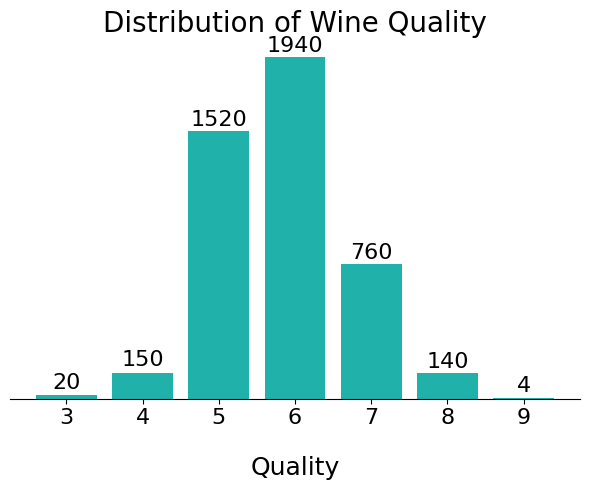

In [4]:
quality_distribution(train)

---

# Question: `Does the Alcohol content impact wine Quality?`</font>

<font size="3"> H0: There is no statistically significant monotonic relationship between the quality of the wine and the alcohol content.</font>

<font size="3">Ha: There is a statistically significant monotonic relationship between the quality of the wine and the alcohol content.</font>

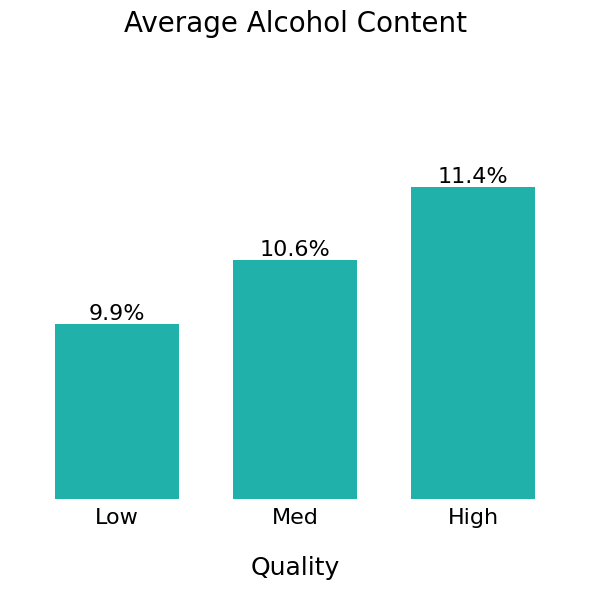

In [5]:
alcohol_vs_quanity(train)

In [6]:
spearmanr_test(train,'alcohol')

There is a statistically significant Spearman's rank correlation (p-value = 0.0000, corr = 0.4471).


<font size="5">We `REJECT` the null hypothesis</font><br>
<font size="4">`There is a relationship` between the `Quality` of the wine and the `Alcohol` content.</font>

---

# Question:`Does the Density impact wine Quality?`
   </font>

H0: There is no statistically significant monotonic relationship between the quality of the wine and the density.

Ha: There is a statistically significant monotonic relationship between the quality of the wine and the density.

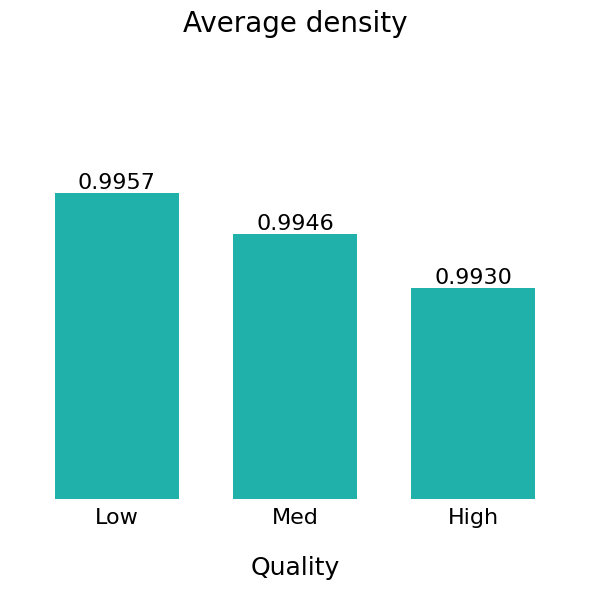

In [7]:
density_vs_quantity(train)

In [8]:
spearmanr_test(train,'density')

There is a statistically significant Spearman's rank correlation (p-value = 0.0000, corr = -0.3168).


<font size="5">We `REJECT` the null hypothesis</font><br>
<font size="4">`There is a relationship` between the `Quality` of the wine and the `Density`</font>

---

# Question: `Does the Volatile Acidity impact wine Quality?`
   </font>

H0: There is no statistically significant monotonic relationship between the quality of the wine and the Volatile Acidity.

Ha: There is a sstatistically significant monotonic relationship between the quality of the wine and the Volatile Acidity.

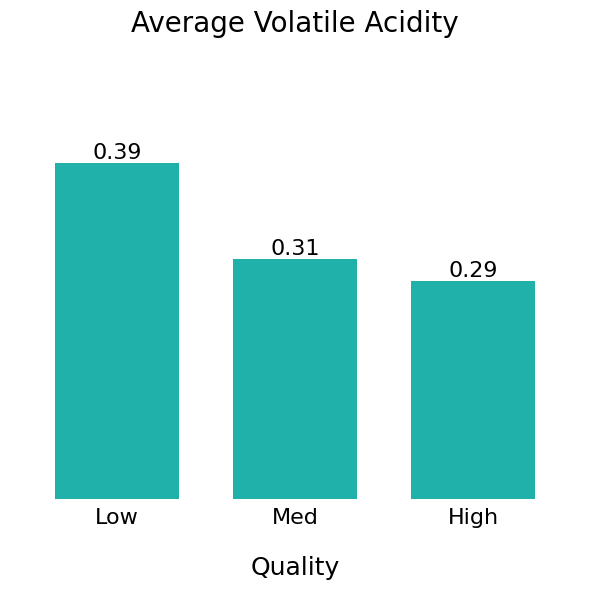

In [9]:
v_acidity_vs_quantity(train)

In [10]:
spearmanr_test(train,'volatile_acidity')

There is a statistically significant Spearman's rank correlation (p-value = 0.0000, corr = -0.2609).


<font size="5">We `REJECT` the null hypothesis.</font><br>
<font size="4">`There is a relationship` between the `Quality` of the wine and the `Alcohol` content.</font>

---

# Question:* `Does the new cluster feature impact wine Quality?`
   </font>

H0: There is no significant association between the quality of the wine and the Alcohol/Density Cluster.

Ha: There is a significant association between the quality of the wine and the Alcohol/Density Cluster.

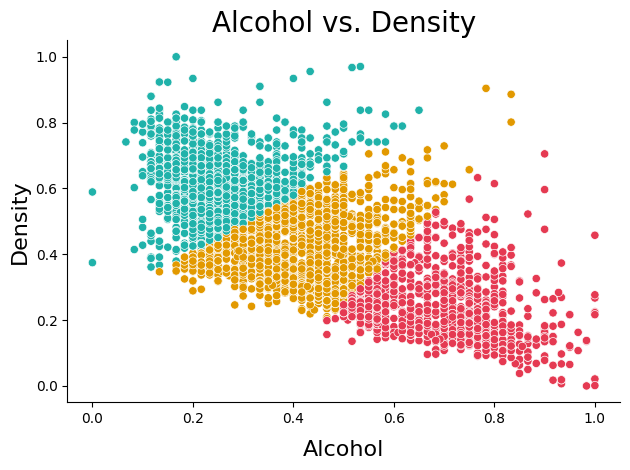

In [11]:
qual_cluster(train)

In [12]:
from explore import perform_chi2_test

perform_chi2_test(train, 'alc_dens_cluster', 'quality')

Chi-Squared Test of Independence:
Chi-Squared Statistic: 933.9216
P-value: 0.0000


<font size="5">We `REJECT` the null hypothesis.</font><br>
<font size="4">`There is` a significant association between `Quality` of the wine and the `Alcohol/Density Cluster`.</font>

In [13]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type
3761,9.9,0.490,0.23,2.4,0.087,19.0,115.0,0.99480,2.77,0.44,9.400000,6,white
3740,7.7,0.280,0.35,15.3,0.056,31.0,117.0,0.99980,3.27,0.50,9.600000,5,white
1359,11.6,0.475,0.40,1.4,0.091,6.0,28.0,0.99704,3.07,0.65,10.033333,6,red
1230,7.7,0.180,0.34,2.7,0.066,15.0,58.0,0.99470,3.37,0.78,11.800000,6,red
4751,7.6,0.250,1.23,4.6,0.035,51.0,294.0,0.99018,3.03,0.43,13.100000,6,white


In [14]:
df = new_feats(train)
df = cluster_two(train)

/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


___
<font size="5">Exploration Summary</font><br>
___

We performed `Spearman's` test on: 

 - Alcohol
 - Density
 - Volatile Acidity
 - Alcohol + Density Cluster
 
 `All indicated a relationship`


<font size="5">Feature Engineering</font><br>

2 additional columns:
- *`'type'`*: Red or White from the made from the separate original csv files.
- *`'alc_dens_cluster'`*: Alcohol + Density Cluster categorical feature.

We performed feature selection using:
 
- `SelectKbest`
- `RFE`
- `LASSO`

In [15]:
feature_selections_results(train, 'quality', 4)

,Kbest,RFE,Lasso
0,alcohol,density,fixed_acidity
1,alcohol_by_density,alcohol,volatile_acidity
2,density,total_acidity,sulfur_dioxide_index
3,volatile_acidity,alcohol_by_density,chlorides_by_residual_sugar


____
____
## MODELING
____
____

- I will use the Root Mean Squared Error `(RMSE)` as my evaluation metric for regression models.
- Models will be `evaluated on train and validate` data
- Baseline RMSE is `0.88` on train data
- The model that performs the best will then be evaluated on test data


<font size="3">Preprocesses: </font><br><br>

- Split:
    - 70% training set
    - 15% validation set
    - 15% test set.
<br>
<br>
- Separates features (X) and labels (y) for the training and validation sets
- Scaling using Min-Max.
<br><br>



___
## Baseline
___

In [31]:
# Split df into train, validat and test dataframes 
# Split further into X and Y dataframes respectively 
X_train, y_train, X_val, y_val, X_test, y_test = data_pipeline()

In [17]:
# Split df into train, validat and test dataframes 
# Split further into X and Y dataframes respectively 
X_train, y_train, X_val, y_val, X_test, y_test = data_pipeline_features()

In [19]:
mms = MinMaxScaler()

# Select columns to scale (excluding 'value')
to_scale = X_train.select_dtypes(include=['float', 'int']).columns.tolist()

# Apply Min-Max scaling to the selected columns
X_train[to_scale] = mms.fit_transform(X_train[to_scale])

In [20]:

X_val[to_scale] = mms.transform(X_val[to_scale])
X_test [to_scale] = mms.transform(X_test[to_scale])

In [32]:
X_test.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,type_white
3431,7.7,0.44,0.24,11.2,0.031,41.0,167.0,0.99480,3.12,0.43,11.3,True
2108,6.0,0.24,0.27,1.9,0.048,40.0,170.0,0.99380,3.64,0.54,10.0,True
5828,6.3,0.26,0.25,5.2,0.046,11.0,133.0,0.99202,2.97,0.68,11.0,True
5945,6.7,0.27,0.69,1.2,0.176,36.0,106.0,0.99288,2.96,0.43,9.2,True
476,9.3,0.27,0.41,2.0,0.091,6.0,16.0,0.99800,3.28,0.70,9.7,False


Calculate the Root Mean Squared Error `(RMSE)` between actual target values and baseline predictions. <br>
The baseline prediction is computed as the `mean` of the actual target values (y_train).

In [19]:
# Calculate baseline using mean
eval_baseline(y_train)

0.8747

<font size="4">Baseline `0.88`</font>

____
### ALPHA Feature Set
____

- Original 12 features
- Wine type feature
- `Not scaled`


<font size="4">Random Forest</font><br><br>


In [22]:
rforest, alpha = train_model(RandomForestRegressor, X_train, y_train, X_val, y_val)

The train RMSE is 0.23.
The validate RMSE is 0.66.


<font size="4">XGBoost</font><br><br>


In [23]:
xgbr, alpha = train_model(XGBRegressor, X_train, y_train, X_val, y_val, alpha)

The train RMSE is 0.23.
The validate RMSE is 0.67.


<font size="4">`RMSE Results` for Alpha feature set</font><br><br>

In [22]:
# Show Alpha Models results table
alpha

,Model,Train_RMSE,Val_RMSE
0,RandomForestRegressor,0.23,0.65
1,XGBRegressor,0.23,0.67


____
### BRAVO Feature Set
____

- Original 12 features
- Wine type feature
- `MinMax scaled`
- `Alcohol+Density Cluster Feature`


In [33]:
# Split df into train, validat and test dataframes 
# Split further into X and Y dataframes respectively 
X_train, y_train, X_val, y_val, X_test, y_test = bravo_pipeline()

<font size="4">LinearRegression</font><br><br>


In [25]:
linearr, bravo = train_model(LinearRegression, X_train, y_train, X_val, y_val)

The train RMSE is 0.72.
The validate RMSE is 0.77.


In [34]:
X_train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,alc_dens_cluster,type_white
1360,0.457627,0.306667,0.186747,0.066798,0.171096,0.034722,0.073733,0.595899,0.403101,0.191011,0.483333,1,False
1231,0.338983,0.490000,0.006024,0.078585,0.107973,0.163194,0.193548,0.548854,0.511628,0.224719,0.466667,1,False
4749,0.169492,0.206667,0.283133,0.271120,0.029900,0.038194,0.188940,0.216526,0.511628,0.129213,1.000000,2,True
4341,0.355932,0.100000,0.168675,0.082515,0.064784,0.166667,0.366359,0.487937,0.418605,0.280899,0.250000,0,True
4376,0.322034,0.080000,0.216867,0.051081,0.056478,0.079861,0.241935,0.317250,0.441860,0.179775,0.550000,2,True


In [25]:
bravo

,Model,Train_RMSE,Val_RMSE
0,LinearRegression,0.72,0.77


____
### `Hyperparameters`
____
####  ALPHA RandomForestRegressor 



In [26]:
rforest, alpha = train_hyper(RandomForestRegressor, X_train, y_train, X_val, y_val,)

The train RMSE is 0.22.
The validate RMSE is 0.64.


<font size="5">Comparing Models</font><br><br>

 - XGBoos, LinearRegression and RandomForestRegressor models all performed better than baseline.
 - I have chosen to move forward with the `RandomForestRegressor` model with `hyperparameters` as it had a the best predictive performance.

<font size="5">`Random Forest Regresor on Test Data`</font><br><br>

In [27]:
test_alpha = test_model(rforest, X_test, y_test)

The test RMSE is 0.59.


<font size="4">Final RMSE on Test data `0.59`</font><br><br>

<font size="5">Modeling Summary</font><br><br>

 - `RandomForestRegressor model scored RMSE 0.59` compared to the `baseline of 0.88`, it had an improvement of aprox $0.29 RMSE.

<font size="5">Conclusions</font><br><br>

 - Found a strong relationship between Alcohol, Density, Volatile Acidity and Alcohol + Density Cluster to the Quality of the wines.
 - Engineered 2 new columns.
   - *'type'*
   - *'alc_dens_cluster'*
<br><br>

 - Performed feature selection to find top features:
   - free_sulfur_dioxide
   - chlorides
   - total_sulfur_dioxide
   - volatile_acidity
   - sulphates
   - fixed_acidity 
<br><br>

 - The final model significantly out performed the baseline.

<font size="5">Recommendations</font><br><br>

      - Feature engineering 
      - Using ratios between original features
      - Using clusters to create new categorical features